## 2D Geometric Linear Transformations: Theory, Algorithms, and Visualizations
This notebook explores 2D linear geometric transformations from both theoretical and practical perspectives. We introduce the matrix representations of common transformations—rotation, scaling and reflection derive their properties, and show how composition of these matrices work. Emphasis is placed on intuition (what a matrix does to points and vectors) and clear visualizations.

What you will discuss:
- How to construct and interpret 2×2 transformation matrices.
- Interactive visualizations and code examples for building and combining transformations.

How the notebook is organized:
1. Mathematical foundations and matrix forms for common transforms.
2. Plotting with matplotlib.

Prerequisites: basic familiarity with Python, NumPy, and linear algebra.

---
---

### Mathematical foundations and matrix forms for common transforms:

Any linear transformation can be summarized by where the basis vectors of the domain subspace land after applying the transformation — linearity means it preserves vector addition and scalar multiplication. **We will try to understand this statement by giving a concrete example**

**Linearity Definition:**

$$T\left(\sum_{i=1}^n c_i \mathbf{v}_i\right)=\sum_{i=1}^n c_i\,T(\mathbf{v}_i)$$

**For the standard basis:**

$$T\left(\sum_{i=1}^n c_i\,\mathbf{e}_i\right)=\sum_{i=1}^n c_i\,T(\mathbf{e}_i)$$

Now to see a concrete example, consider the 90° counterclockwise rotation.

Suppose

$$T(\mathbf{e}_1)=\begin{pmatrix}0\\1\end{pmatrix},\qquad T(\mathbf{e}_2)=\begin{pmatrix}-1\\0\end{pmatrix}.$$

For a general vector $\mathbf v = x\mathbf e_1 + y\mathbf e_2$, linearity gives

$$T(\mathbf v)=x\,T(\mathbf e_1)+y\,T(\mathbf e_2)= x\begin{pmatrix}0\\1\end{pmatrix}+y\begin{pmatrix}-1\\0\end{pmatrix}=\begin{pmatrix}-y\\x\end{pmatrix}.$$

Writing this as $T(\mathbf v)=A\mathbf v$ we see $A$ has columns $T(\mathbf e_1)$ and $T(\mathbf e_2)$, so

$$A=\begin{pmatrix}0 & -1\\1 & 0\end{pmatrix}.$$

For a general vector $\mathbf v=\begin{pmatrix}x\\y\end{pmatrix}$,

$$T(\mathbf v)=A\mathbf v=\begin{pmatrix}0 & -1\\1 & 0\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix}=\begin{pmatrix}-y\\x\end{pmatrix}.$$

As we have shown the we transformed our original vector Equation into an Equivalent matrix Equation to make our notation easier.

---

**Now we have the basic idea let's see common linear transformations:**

1.For scaling by factors \(s_x\) and \(s_y\):

$$
A=\begin{pmatrix}s_x & 0\\[4pt] 0 & s_y\end{pmatrix},
\qquad
A\begin{pmatrix}x\\[4pt] y\end{pmatrix}=\begin{pmatrix}s_x x\\[4pt] s_y y\end{pmatrix}.
$$

For uniform scaling \(s\):

$$
A=sI=\begin{pmatrix}s & 0\\[4pt] 0 & s\end{pmatrix}.
$$


For reflection through the y-axis:

$$
A=\begin{pmatrix}-1 & 0\\[4pt] 0 & 1\end{pmatrix},
\qquad
A\begin{pmatrix}x\\[4pt] y\end{pmatrix}=\begin{pmatrix}-x\\[4pt] y\end{pmatrix}.
$$

For Rotation by phi degrees:

![Rotation matrix image(edited).png](<image.png>)
<style>
img[src="image.png"] {
    display: block;
    margin-left: auto;
    margin-right: auto;
}
</style>


$$
R(\varphi)=\begin{pmatrix}\cos\varphi & -\sin\varphi\\[4pt]\sin\varphi & \cos\varphi\end{pmatrix},
\qquad
R(\varphi)\begin{pmatrix}x\\[4pt]y\end{pmatrix}=\begin{pmatrix}x\cos\varphi - y\sin\varphi\\[4pt]x\sin\varphi + y\cos\varphi\end{pmatrix}.
$$

**Fun Fact we can do all of the previous transformations with complex numbers but more on that at the end of the notebook.**

---

Composition of linear transforms is just matrix multiplication.

- If $A$ and $B$ represent linear maps $T_A$ and $T_B$, then
    $$
    (T_B\circ T_A)(\mathbf v)=T_B(T_A(\mathbf v))=B\big(A\mathbf v\big)=(BA)\mathbf v,
    $$
    so the rightmost matrix is applied first.

Why this works (briefly): a linear map is determined by its action on the standard basis. Let $\mathbf e_i$ be the basis and let $A=[\mathbf a_1\ \mathbf a_2]$ where $\mathbf a_i=A\mathbf e_i$ are the columns of $A$. For any $\mathbf v=v_1\mathbf e_1+v_2\mathbf e_2$,
$$
A\mathbf v=v_1\mathbf a_1+v_2\mathbf a_2.
$$
Applying $B$ gives
$$
B(A\mathbf v)=v_1B\mathbf a_1+v_2B\mathbf a_2,
$$
so the composite map has matrix whose columns are $B\mathbf a_i$, i.e.
$$
BA=[B\mathbf a_1\ \; B\mathbf a_2].
$$
Thus composition corresponds exactly to multiplying matrices (apply rightmost first). Short takeaway: composition = multiply matrices; columns of the product are the image under the left matrix of the columns of the right matrix.

### Now let's see these transformations in action:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# transformation 1 is reflection in the y axis then scale down by 2
# transformation 2 is reflection in the origin and scale down by 2 and probably it has a rotation too.

LeftLeg = np.array(
    [
        [[2], [2]],
        [[2], [3]],
        [[4.25], [3]],
        [[2], [4]],
        [[2], [5]],
        [[3], [6]],
        [[4], [6]],
        [[9], [2]],
    ]
)

# reflect about line x=13: x' = 2*13 - x = 26 - x
RightLeg = LeftLeg.copy()
RightLeg[:, 0, 0] = 26 - RightLeg[:, 0, 0]

Stomach = np.array(
    [
        [[9], [2]],
        [[8], [5]],
        [[8], [8]],
        [[10], [9]],
        [[16], [9]],
        [[18], [8]],
        [[18], [5]],
        [[17], [2]],
    ]
)

# the body moves around the stomach and doesn't include it
Body = np.array(
    [
        [[9], [2]],
        [[8], [5]],
        [[8], [8]],
        [[10], [9]],
        [[16], [9]],
        [[18], [8]],
        [[8], [5]],
        [[17], [2]],
        [[22], [6]],
        [[23], [8]],
        [[23], [11]],
        [[20], [15]],
        [[20], [17]],
        [[18], [19]],
        [[15], [19]],
        [[14], [17]],
        [[14], [16]],
        [[12], [16]],
        [[12], [17]],
        [[11], [19]],
        [[8], [19]],
        [[6], [17]],
        [[6], [15]],
        [[3], [11]],
        [[3], [8]],
        [[4], [6]],
    ]
)

Smile = np.array(
    [
        [[6], [13]],
        [[7], [12]],
        [[19], [12]],
        [[20], [13]],
    ]
)

EyeLeft = np.array(
    [
        [[8], [14]],
        [[7], [15]],
        [[7], [17]],
        [[8], [18]],
        [[10], [18]],
        [[11], [17]],
        [[11], [13]],
        [[10], [14]],
    ]
)

EyeLeftIris = np.array(
    [
        [[8], [16]],
        [[8], [17]],
        [[9], [17]],
        [[9], [16]],
    ]
)

EyeRight = EyeLeft.copy()
EyeRight[:, 0, 0] = 26 - EyeRight[:, 0, 0]

EyeRightIris = np.array(
    [
        [[16], [16]],
        [[16], [17]],
        [[17], [17]],
        [[17], [16]],
    ]
)

## that's it for the frog now the arrow

In [30]:
from sympy import *
from sympy.abc import phi, x, y

# this part is incomplete and you should complete it

# ReflectionY = Matrix([[-1, 0], [0, 1]])
# RotatePhi = Matrix([[cos(phi), -sin(phi)], [sin(phi), cos(phi)]])

# ReflectionY_f = lambdify(
#     [x, y], ReflectionY
# )  # f for function this can be directly applied to a 2x1 vector
# RotatePhi_f = lambdify([phi], RotatePhi)

# ReflectionY_f()

discuss translation as we did above for rotation

In [ ]:
Home = np.array(
    [
        [[1], [1]],
        [[1], [3]],
        [[3], [0]],
        [[4], [4.3]],
        [[4], [4.5]],
        [[4.5], [4.5]],
        [[4.5], [4]],
        [[6], [3]],
        [[5], [3]],
        [[5], [1]],
    ]
)

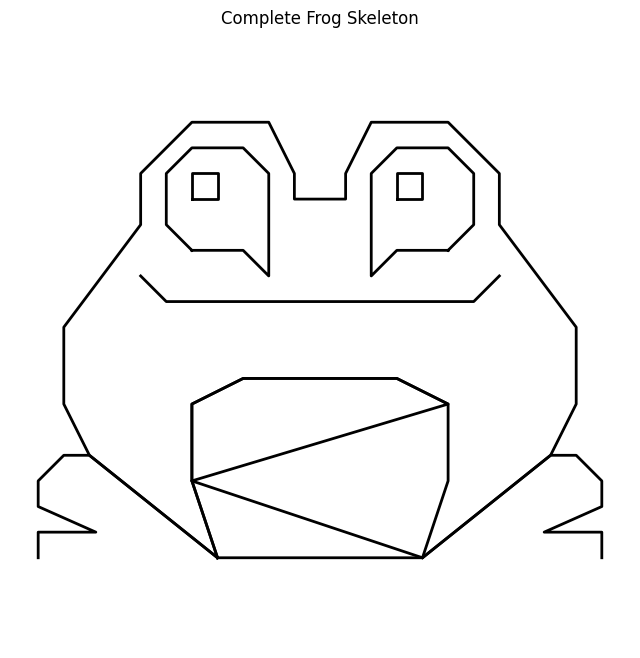

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def draw_part(part, closed=False, **kwargs):
    x = part[:, 0, 0]
    y = part[:, 1, 0]

    if closed:
        x = np.append(x, x[0])
        y = np.append(y, y[0])

    plt.plot(x, y, **kwargs)

# Draw the frog
plt.figure(figsize=(8, 8))

# Common style: BLACK lines
style = dict(color="black", linewidth=2)

# Draw complete body outline (closed loop)
draw_part(Body, closed=True, **style)

# Draw stomach inside
draw_part(Stomach, closed=True, **style)

# Draw legs
draw_part(LeftLeg, **style)
draw_part(RightLeg, **style)

# Draw face
draw_part(Smile, **style)
draw_part(EyeLeft, closed=True, **style)
draw_part(EyeLeftIris, closed=True, **style)
draw_part(EyeRight, closed=True, **style)
draw_part(EyeRightIris, closed=True, **style)

# Plot settings
plt.axis("equal")
plt.axis("off")
plt.title("Complete Frog Skeleton")

plt.show()